In [1]:
# Su dung thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# import dataset da tai ve
# Load the dataset with the correct delimiter
data = pd.read_csv(r"C:\Users\Administrator\Downloads\predict+students+dropout+and+academic+success\data.csv", delimiter=';')


In [7]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [8]:
# Merge classes: Dropout/Enrolled: 0 (Non-graduate), Graduate: 1
data['Target'] = data['Target'].map({
    'Graduate': 1,
    'Dropout': 0,
    'Enrolled': 0
})

In [9]:
# Chia bo du lieu thanh bien: features (X), va target (y)
X = data.drop(columns=['Target']).values  # loai bo cot Target
y = data['Target'].values.reshape(-1, 1)  # Dam bao Y la 1 column vector

In [25]:
# Normalize features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

### Assignment 1:

In [26]:
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15)).mean()

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - (y_hat > 0.5).astype(float))).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e + 1}")
                y_hat = self.predict(X)

                diff = y_hat - y
                gradient = (1 / n) * np.matmul(X.T, diff)
                self.theta -= self.lr * gradient

                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({
                    "loss": loss,
                    "acc": acc
                })
                
                self.losses.append(loss)
                self.metrics.append(acc)
                
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        y_hat = self.sigmoid(z)
        return y_hat

In [27]:
# tao ban sao cua object (instantiate)
logistic_reg = LogisticRegression(500, 0.01)

In [28]:
# train model
logistic_reg.fit(X,y)

Epoch 500: 100%|██████████| 500/500 [00:01<00:00, 477.03it/s, loss=0.417, acc=0.825]


In [29]:
# danh gia do chinh xac cua mo hinh
y_pred = logistic_reg.predict(X)
accuracy = logistic_reg.accuracy(y, y_pred)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

Final Accuracy: 82.50%


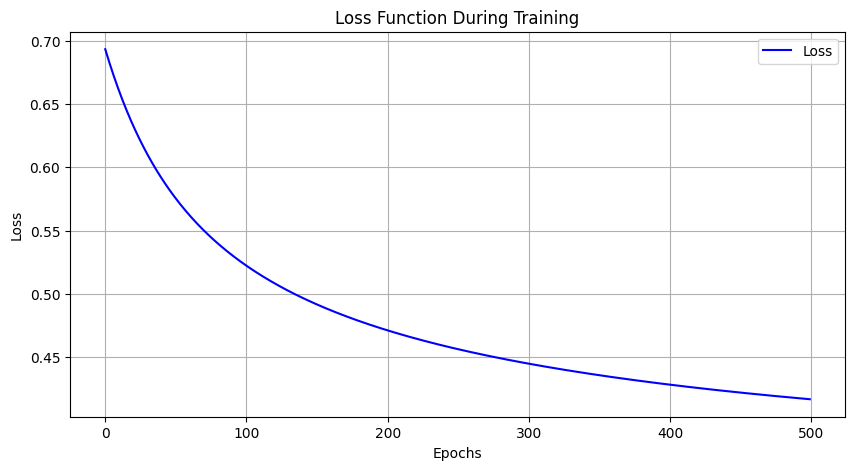

In [38]:
# truc quan hoa ham loss
plt.figure(figsize=(10, 5))
plt.plot(logistic_reg.losses, label='Loss', color='blue')
plt.title('Loss Function During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Assignment 2:

In [33]:
class SoftmaxRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def softmax(self, z: np.ndarray) -> np.ndarray:
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # ngan overflow khi z qua lon
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -np.mean(np.sum(y * np.log(y_hat + 1e-6), axis=1))

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return (1 - np.abs(y - y_hat)).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n, d = X.shape
        k = y.shape[1]  # Number of classes in y (2 from Graduate & Non-Graduate)
        self.theta = np.random.rand(d, k) * 0.01  # Initialize weights
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                pb.set_description(f"Epoch {e + 1}")

                s = self.predict(X)

                # Calculate loss and accuracy
                loss = self.loss_fn(y, s)
                acc = self.accuracy(y, s)

                gradient = (1 / n) * np.dot(X.T, (s - y))
                self.theta -= self.lr * gradient
                
                pb.set_postfix({
                    "loss": loss,
                    "acc": acc
                })
                
                self.losses.append(loss)
                self.metrics.append(acc)
                
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.dot(X, self.theta)
        return self.softmax(z)

In [34]:
# One-hot encode the target variable
y_one_hot = np.zeros((y.size, 2))  # Two classes
y_one_hot[np.arange(y.size), y.flatten()] = 1

In [ ]:
# Train model
softmax_reg = SoftmaxRegression(epoch=500, lr=0.01)
softmax_reg.fit(X, y_one_hot)

Epoch 500: 100%|██████████| 500/500 [00:01<00:00, 339.09it/s, loss=0.389, acc=0.73] 


In [36]:
# danh gia mo hinh
y_pred = softmax_reg.predict(X)
accuracy = softmax_reg.accuracy(y_one_hot, y_pred)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

Final Accuracy: 73.00%


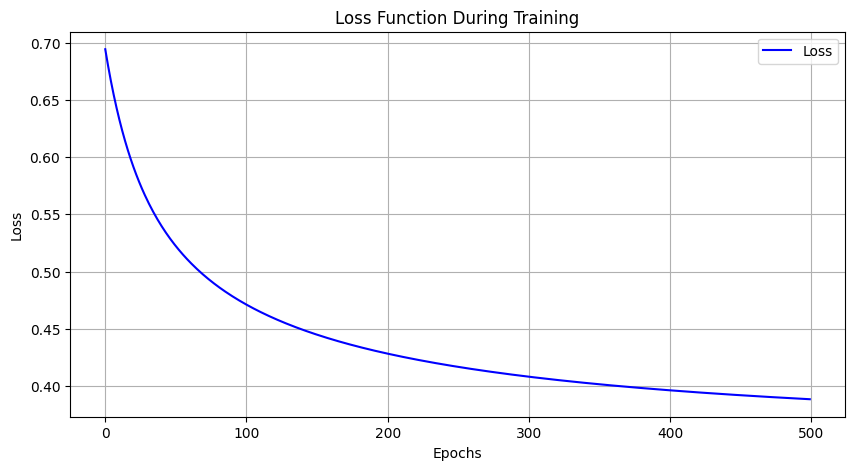

In [37]:
# truc quan hoa ham loss
plt.figure(figsize=(10, 5))
plt.plot(softmax_reg.losses, label='Loss', color='blue')
plt.title('Loss Function During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Assignment 3:

In [57]:
# them thu vien sklearn de su dung logistic regression/softmax regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# thu vien cho Softmax Regression
import torch
import torch.nn as nn
import torch.optim as optim

In [43]:
y2 = data['Target'].values.ravel()

In [45]:
# chia dataset thanh training va testing set
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [46]:
# chuan hoa
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# 1. Implement Logistic Regression (Binary Classification)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [48]:
# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.8282485875706215
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       467
           1       0.78      0.88      0.83       418

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



In [58]:
# 2. Implement Softmax Regression (Multi-Class Classification)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Define the neural network model
class SimpleNet(nn.Module):
    def __init__(self, n_features):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(n_features, 2)  # 2 output classes for softmax

    def forward(self, X):
        return self.fc(X)

# Create a model instance
model = SimpleNet(X_train.shape[1])
criterion = nn.CrossEntropyLoss()  # For softmax regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(torch.FloatTensor(X_train))
    loss = criterion(output, torch.LongTensor(y_train))
    loss.backward()
    optimizer.step()

In [61]:
# danh gia mo hinh
model.eval()
with torch.no_grad():
    output = model(torch.FloatTensor(X_test))
    _, predicted = torch.max(output.data, 1)
    accuracy = (predicted.numpy() == y_test).mean()

print(f"Softmax Regression Accuracy: {accuracy * 100:.2f}%")

Softmax Regression Accuracy: 82.15%
